In [1021]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [1022]:
df = pd.read_csv('DataSet3_2.csv', sep = ';')
df['Dollar'] = df['Dollar'].str.replace(',', '.').astype(float)
df['Oil Brent'] = df['Oil Brent'].str.replace(',', '.').astype(float)
df['Dollar'] = df['Dollar'].astype(int)
df['Oil Brent'] = df['Oil Brent'].astype(int)

df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
start_date = pd.to_datetime('01.01.2020', format='%d.%m.%Y')
df['Data'] = (df['Data'] - start_date).dt.days
df.head()

,Data,Dollar,Oil Brent
0,0,61,66
1,8,61,65
2,9,61,65
3,10,61,64
4,13,60,64


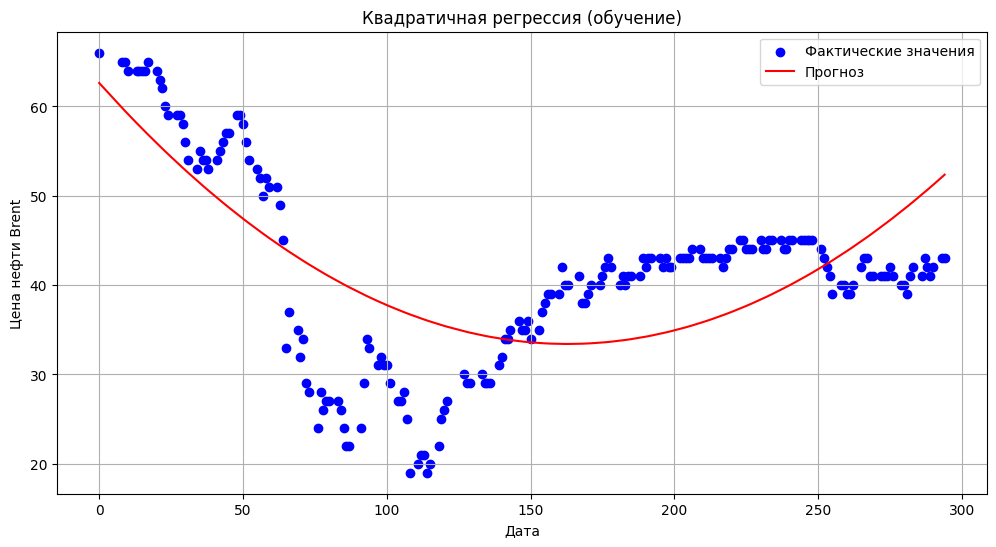

In [1023]:
data_length = len(df)
train_size = int(data_length * 0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

X_train = train_data['Data']
y_train = train_data['Oil Brent']
X_test = test_data['Data']
y_test = test_data['Oil Brent']

# Добавление столбцов с x и x^2 для обучения коэффициентов c0, c1 и c2
X_train = pd.DataFrame({'constant': 1, 'x': X_train, 'x^2': X_train**2})

# Вычисление коэффициентов квадратичной регрессии
coefficients = np.linalg.lstsq(X_train, y_train, rcond=None)[0]

# Применение найденных коэффициентов к тренировочным данным
y_pred_train = X_train.dot(coefficients)

# Построение графика
plt.figure(figsize=(12, 6))
plt.scatter(X_train['x'], y_train, label='Фактические значения', color='blue')
plt.plot(X_train['x'], y_pred_train, label='Прогноз', color='red')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Квадратичная регрессия (обучение)')
plt.legend()
plt.grid(True)
plt.show()


In [1024]:
data_length = len(df)
train_size = int(data_length * 0.8)

# Разделите данные на обучающий и тестовый наборы
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

X_train = train_data[['Data']]
X_test = test_data[['Data']]
y_train = train_data['Oil Brent']
y_test = test_data['Oil Brent']


# Модель
model = LinearRegression()
model.fit(X_train, y_train)

c0 = model.intercept_
c1 = model.coef_[0]

# Найденные коэффициенты
print(f'c0 (сдвиг): {c0}')
print(f'c1 (наклон): {c1}')

# Предсказаные значения на тестовых данных
y_pred = model.predict(X_test)

# Вычислите среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(len(train_data), len(test_data))


c0 (сдвиг): 45.77487259270692
c1 (наклон): -0.028949577799415826
Mean Squared Error (MSE): 99.20056834131942
200 50


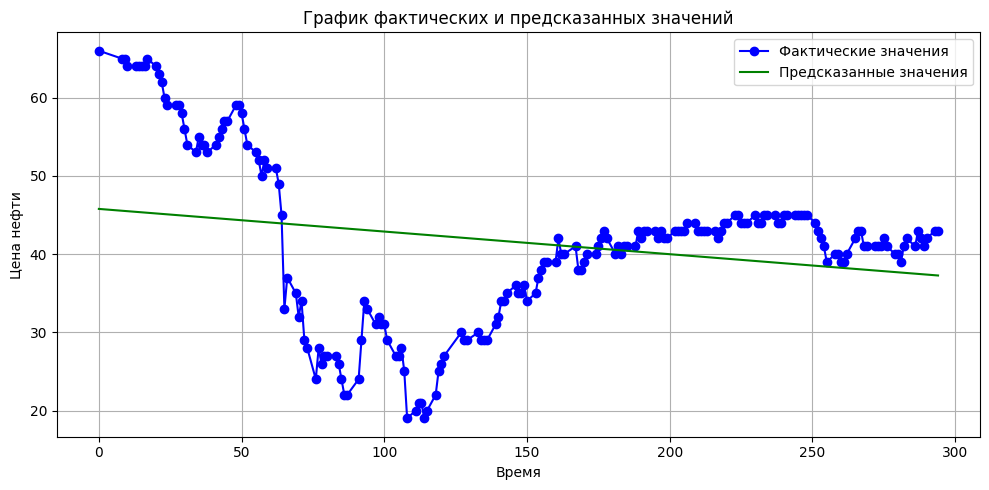

In [1025]:
x_real = X_train  # Даты из тестового набора
y_real = y_train  # Фактические значения

# Предсказанные значения
y_pred = model.predict(X_train)

# Создайте массив значений X для графика (в данном случае - даты из тестового набора)
x_values = x_real

# Создайте график реальных значений
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_real, label='Фактические значения', marker='o', color='blue')

# Создайте график предсказанных значений
plt.plot(x_values, y_pred, label='Предсказанные значения', color='green')

# Настройте внешний вид графика
plt.title('График фактических и предсказанных значений')
plt.xlabel('Время')
plt.ylabel('Цена нефти')
plt.legend()
plt.grid(True)

# Отобразите график
plt.tight_layout()
plt.show()

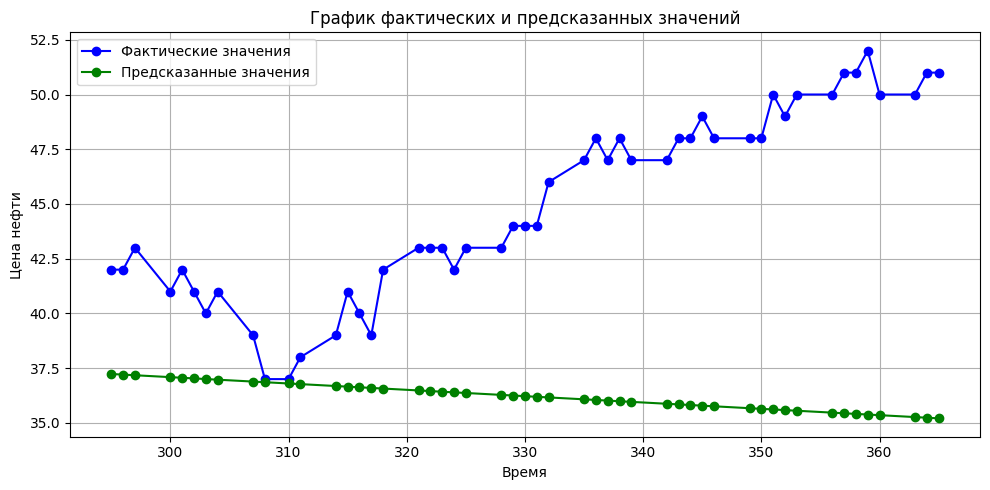

In [1026]:
x_real = X_test  # Даты из тестового набора
y_real = y_test  # Фактические значения

# Предсказанные значения
y_pred = model.predict(X_test)

# Создайте массив значений X для графика (в данном случае - даты из тестового набора)
x_values = x_real

# Создайте график реальных значений
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_real, label='Фактические значения', marker='o', color='blue')

# Создайте график предсказанных значений
plt.plot(x_values, y_pred, label='Предсказанные значения', marker='o', color='green')

# Настройте внешний вид графика
plt.title('График фактических и предсказанных значений')
plt.xlabel('Время')
plt.ylabel('Цена нефти')
plt.legend()
plt.grid(True)

# Отобразите график
plt.tight_layout()
plt.show()

In [1027]:
# Создайте и обучите модель KNN для регрессии
knn_model = KNeighborsRegressor(n_neighbors=3) 
knn_model.fit(X_train, y_train)

# Предскажите значения на тестовых данных
y_pred_knn = knn_model.predict(X_test)

# Вычислите среднеквадратичную ошибку (MSE) и коэффициент детерминации (R-squared) для модели KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Выведите результаты
print(f'Mean Squared Error (MSE): {mse_knn}')
print(f'R-squared (R^2): {r2_knn}')


Mean Squared Error (MSE): 23.184444444444463
R-squared (R^2): -0.286852225996562


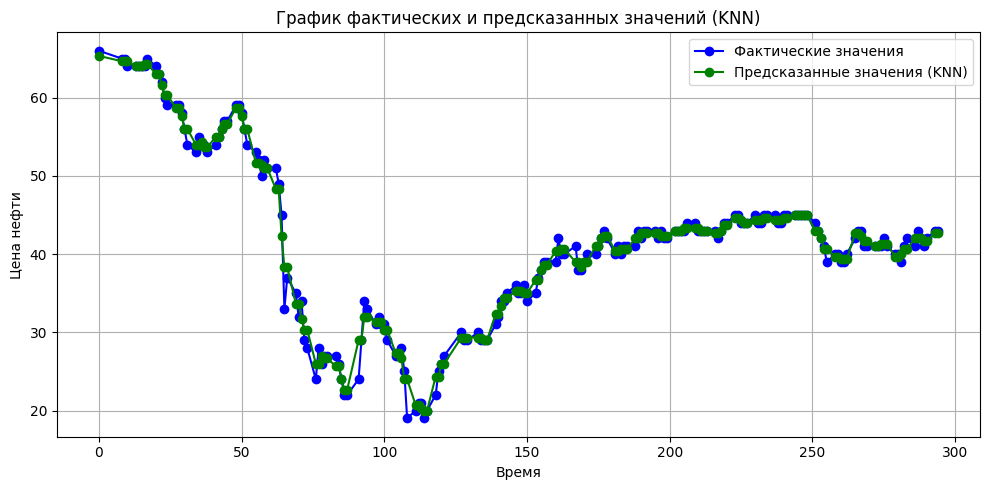

In [1028]:
# Ваши данные
x_real = X_train  # Даты из тестового набора
y_real = y_train  # Фактические значения

# Предсказанные значения от модели KNN
y_pred_knn = knn_model.predict(X_train)
x_values = x_real

# график фактических значений
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_real, label='Фактические значения', marker='o', color='blue')

# график предсказанных значений от KNN
plt.plot(x_values, y_pred_knn, label='Предсказанные значения (KNN)', marker='o', color='green')

plt.title('График фактических и предсказанных значений (KNN)')
plt.xlabel('Время')
plt.ylabel('Цена нефти')
plt.legend()
plt.grid(True)

# Отобразите график
plt.tight_layout()
plt.show()

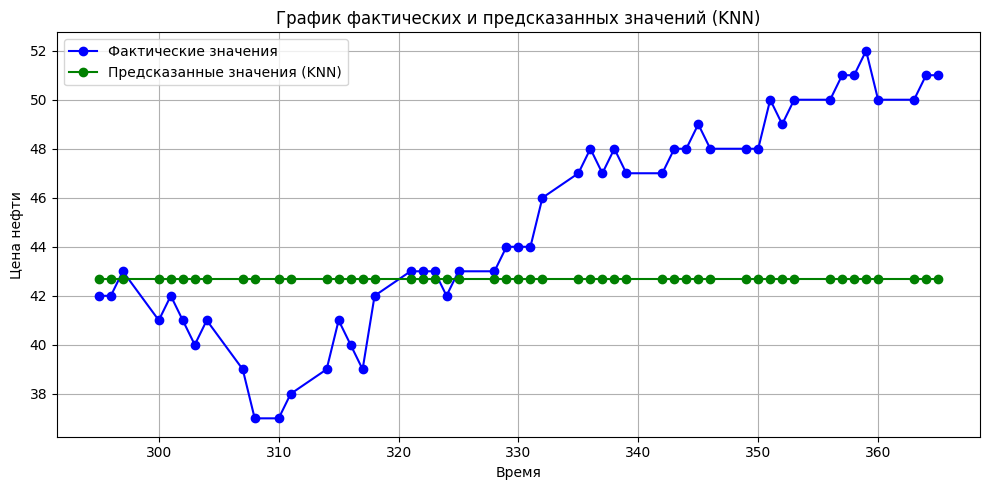

In [1029]:
# Ваши данные
x_real = X_test  # Даты из тестового набора
y_real = y_test  # Фактические значения

# Предсказанные значения от модели KNN
y_pred_knn = knn_model.predict(X_test)
x_values = x_real

# график фактических значений
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_real, label='Фактические значения', marker='o', color='blue')

# график предсказанных значений от KNN
plt.plot(x_values, y_pred_knn, label='Предсказанные значения (KNN)', marker='o', color='green')

plt.title('График фактических и предсказанных значений (KNN)')
plt.xlabel('Время')
plt.ylabel('Цена нефти')
plt.legend()
plt.grid(True)

# Отобразите график
plt.tight_layout()
plt.show()


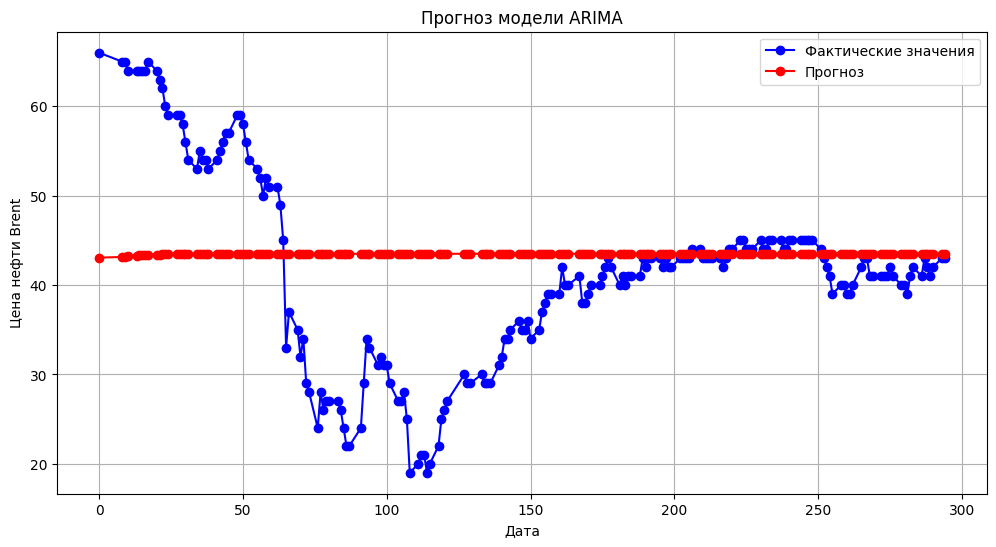

In [1030]:
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# Ваши данные
x_real = X_train  # Даты из тестового набора
y_real = y_train  # Фактические значения

x_values = x_real
arima_forecast = model_fit.forecast(steps=len(y_real))

# График фактических и прогнозируемых значений
plt.figure(figsize=(12, 6))
plt.plot(x_real, y_real, label='Фактические значения', marker='o', color='blue')
plt.plot(x_real, arima_forecast, label='Прогноз', marker='o', color='red')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз модели ARIMA')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error (MSE): 19.847246889917574


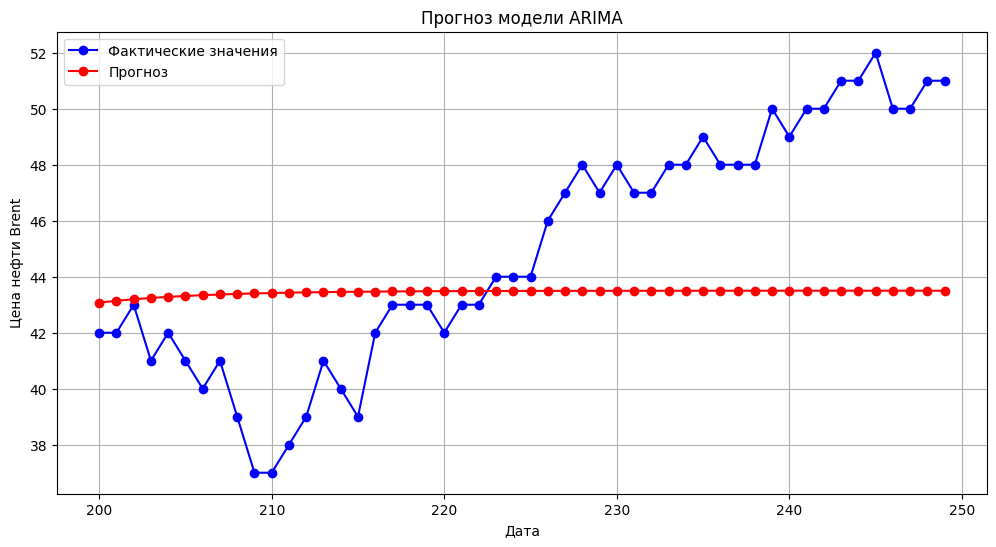

In [1031]:
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# Создайте прогнозы
forecast_steps = len(y_test)
forecast = model_fit.forecast(steps=forecast_steps)

# MSE
mse = mean_squared_error(y_test, forecast)

print(f'Mean Squared Error (MSE): {mse}')

# График фактических и прогнозируемых значений
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Фактические значения', marker='o', color='blue')
plt.plot(X_test.index, forecast, label='Прогноз', marker='o', color='red')
plt.xlabel('Дата')
plt.ylabel('Цена нефти Brent')
plt.title('Прогноз модели ARIMA')
plt.legend()
plt.grid(True)
plt.show()

